In [3]:
# Pandas 라이브러리 임포트
import pandas as pd 
from pandas import Series, DataFrame

In [2]:
# 1. 빈 데이터프레임 생성
DataFrame()

""


In [4]:
# 2. 데이터프레임 생성하고 데이터 할당하기
df = DataFrame(data = [[1,2,3], ['kim','park','lee']],
              index = ['A','B'],
              columns = ['a','b','c'])
df

,a,b,c
A,1,2,3
B,kim,park,lee


In [5]:
# 3. 사전 타입 데이터를 이용하여 데이터 프레임 생성하기
인구통계 = {'서울': [950, 945, 938.5],
        '대전':[50, 151, 145],
        '대구':[85, 88, 92],
        '부산':[180, 187, 192],
        '광주':[74, 80, 80]
      }

In [7]:
df2 = DataFrame(data = 인구통계, index = [2017,2018,2019])
df2

,서울,대전,대구,부산,광주
2017,950.0,50,85,180,74
2018,945.0,151,88,187,80
2019,938.5,145,92,192,80


### 2.2.2. DataFrame 속성 조회하기 (속성을 조회할 때에는 ()를 사용하지 않으니 유의)

In [8]:
#1. index : 데이터프레임의 인덱스를 리스트로 반환
df2.index

Int64Index([2017, 2018, 2019], dtype='int64')

In [9]:
#2. columns : 데이터프레임의 컬럼을 리스트로 반환
df2.columns

Index(['서울', '대전', '대구', '부산', '광주'], dtype='object')

In [10]:
#3. values : 데이터프레임의 데이터 반환 (ndarray)
df2.values

array([[950. ,  50. ,  85. , 180. ,  74. ],
       [945. , 151. ,  88. , 187. ,  80. ],
       [938.5, 145. ,  92. , 192. ,  80. ]])

In [11]:
#4. shape : 행(row)과 열(column)의 개수(차원)을 튜플로 반환
df2.shape

(3, 5)

In [12]:
#5. T (Transpose) : 행과 열을 바꾸기.
df2.T

,2017,2018,2019
서울,950.0,945.0,938.5
대전,50.0,151.0,145.0
대구,85.0,88.0,92.0
부산,180.0,187.0,192.0
광주,74.0,80.0,80.0


In [26]:
#6. axes : 행과 열 이름을 리스트로 반환
df2.axes

[Int64Index([2017, 2018, 2019], dtype='int64'),
 Index(['서울', '대전', '대구', '부산', '광주'], dtype='object')]

In [18]:
#7. dtypes : 컬럼별 데이터타입 반환
print(type(df2.values))
print(df2.dtypes)

<class 'numpy.ndarray'>
서울    float64
대전      int64
대구      int64
부산      int64
광주      int64
dtype: object


In [15]:
#8. size : DataFrame의 원소의 개수를 반환
df2.size

15

### 2.2.3. 데이터프레임 기본 함수

In [20]:
#1. info() - 기본 정보 출력
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 2017 to 2019
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   서울      3 non-null      float64
 1   대전      3 non-null      int64  
 2   대구      3 non-null      int64  
 3   부산      3 non-null      int64  
 4   광주      3 non-null      int64  
dtypes: float64(1), int64(4)
memory usage: 252.0 bytes


In [21]:
#2. describe() - 기본 통계 정보 출력
df2.describe()

,서울,대전,대구,부산,광주
count,3.000000,3.000000,3.000000,3.000000,3.000000
mean,944.500000,115.333333,88.333333,186.333333,78.000000
std,5.766281,56.659804,3.511885,6.027714,3.464102
min,938.500000,50.000000,85.000000,180.000000,74.000000
25%,941.750000,97.500000,86.500000,183.500000,77.000000
50%,945.000000,145.000000,88.000000,187.000000,80.000000
75%,947.500000,148.000000,90.000000,189.500000,80.000000
max,950.000000,151.000000,92.000000,192.000000,80.000000


In [167]:
# 통계 함수 (mean, sum, max, min, ...)
# 0이면 column 단위 1이면 row 단위
print(df2.mean(axis = 1))

print(df2.quantile(0.75))
df2.max()

2017    267.8
2018    290.2
2019    289.5
dtype: float64
서울    947.5
대전    148.0
대구     90.0
부산    189.5
광주     80.0
Name: 0.75, dtype: float64


서울    950.0
대전    151.0
대구     92.0
부산    192.0
광주     80.0
dtype: float64

In [58]:
# 3. sample() - 일부 데이터를 랜덤으로 선택
print(df2.sample(n=2))
print(df2.sample(n=10,replace=True))
df2.sample(2,axis=1)

         서울   대전  대구   부산  광주
2018  945.0  151  88  187  80
2017  950.0   50  85  180  74
         서울   대전  대구   부산  광주
2019  938.5  145  92  192  80
2018  945.0  151  88  187  80
2019  938.5  145  92  192  80
2019  938.5  145  92  192  80
2019  938.5  145  92  192  80
2018  945.0  151  88  187  80
2019  938.5  145  92  192  80
2017  950.0   50  85  180  74
2017  950.0   50  85  180  74
2018  945.0  151  88  187  80


,대전,부산
2017,50,180
2018,151,187
2019,145,192


In [59]:
# 4. head, tail(x) - 맨 앞 혹은 맨 뒤의 x개의 데이터만 출력
df2.head(2)
df2[:2]

,서울,대전,대구,부산,광주
2017,950.0,50,85,180,74
2018,945.0,151,88,187,80


In [63]:
# 5. nunique() - unique한 값의 개수
# Nan값도 보고싶으면 dropna = False 설정
df2.nunique(axis=1, dropna = False)

2017    5
2018    5
2019    5
dtype: int64

<AxesSubplot:>

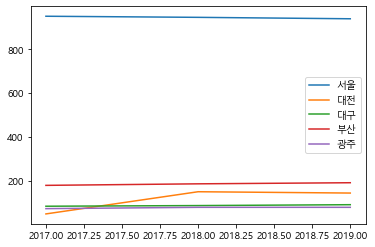

In [64]:
# 6. plot() - 데이터 시각화
import matplotlib as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
df2.plot()

In [71]:
# 7. filter() - 원하는 데이터만 선택 
df2.filter(['서울'])
df2.filter([2019],axis=0)

,서울,대전,대구,부산,광주
2019,938.5,145,92,192,80


In [73]:
# 정규표현식 활용
df2.filter(regex = '^대') # 대로 시작하는 컬럼
df2.filter(regex = '^201')

""
2017
2018
2019


# 3-3차시

### 2.2.3. 데이터프레임 조회하기

In [4]:

# 테스트 데이터프레임 생성
df4 = DataFrame({'Class': ['IoT','Network', 'Economy','Big Data', 'Cloud'],
                       'Year': [2018, 2017, 2018, 2018, 2019],
                       'Price': [100, 125, 132, 312, 250],
                       'Location': ['Korea','Korea', 'Korea', 'US','Korea']},
                      index=['C01','C02','C03', 'C04', 'C05'])
df4

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


In [5]:
# 1. 원하는 열(컬럼)만 조회하기
# 1-1) Class만 조회하기
df4['Class']

C01         IoT
C02     Network
C03     Economy
C04    Big Data
C05       Cloud
Name: Class, dtype: object

In [6]:
# 1-2) Class와 Price 조회하기
df4[['Class','Price']]

,Class,Price
C01,IoT,100
C02,Network,125
C03,Economy,132
C04,Big Data,312
C05,Cloud,250


In [7]:
# 2. 원하는 행(로우)만 조회하기 
df4.loc['C03']

Class       Economy
Year           2018
Price           132
Location      Korea
Name: C03, dtype: object

In [8]:
# 4번째 row 선택
df4.iloc[3]


Class       Big Data
Year            2018
Price            312
Location          US
Name: C04, dtype: object

In [9]:
# CO2, CO4 강의를 선택
df4.loc[['C02','C04']]

,Class,Year,Price,Location
C02,Network,2017,125,Korea
C04,Big Data,2018,312,US


In [10]:
# 3. 인덱스 슬라이싱 
# C02 ~ C04 데이터를 선택

df4.loc['C02':'C04']
df4.loc[['C02','C03','C04']]

,Class,Year,Price,Location
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US


In [11]:
# row 인덱스는 순서가 존재하지만 column 인덱스는 순서가 없음 
df4.loc['Class':'Price']

,Class,Year,Price,Location


In [12]:
# 4. 원하는 행과 열을 선택하여 조회하기 
# C02, C03 강의의 Class와 Year만 조회
#df4['C02':'C03'][['Class','Year']]
#df4.loc[['C02','C03'],['Class','Year']]


In [13]:
df4.loc['C03']

Class       Economy
Year           2018
Price           132
Location      Korea
Name: C03, dtype: object

In [14]:
# Class 부터 Price 까지 칼럼만 선택
df4.loc[:,'Class':'Price']

,Class,Year,Price
C01,IoT,2018,100
C02,Network,2017,125
C03,Economy,2018,132
C04,Big Data,2018,312
C05,Cloud,2019,250


In [15]:
# 5. 조건 색인 
df4[[True,True,False,False,True]]
#값이 200보다 크거나같은것
df4[df4['Price'] >= 200]
df4[df4.Price>=200]

,Class,Year,Price,Location
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


In [16]:
# 아래 결과들이 출력되도록 코드를 완성하시오.
# 실습 1. 'Year' 컬럼만 선택
df4['Year']

C01    2018
C02    2017
C03    2018
C04    2018
C05    2019
Name: Year, dtype: int64

In [17]:
# 실습 2. 'Class'와 'Location' 컬럼만 선택
df4[['Class','Location']]

,Class,Location
C01,IoT,Korea
C02,Network,Korea
C03,Economy,Korea
C04,Big Data,US
C05,Cloud,Korea


In [18]:
# 실습 3. C01과 C03 강의의 모든 컬럼 선택
df4.loc[['C01','C03']]

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C03,Economy,2018,132,Korea


In [19]:
# 실습 4. C01~C03 강의의 Class와 Price만 선택
df4['C01':'C03'][['Class','Price']]

,Class,Price
C01,IoT,100
C02,Network,125
C03,Economy,132


In [20]:
# 실습 4. 2019년도 강의만 조회
df4[df4['Year'] == 2019]

,Class,Year,Price,Location
C05,Cloud,2019,250,Korea


In [21]:
# 실습 5. 가장 가격이 비싼 강의 정보만 조회
df4[df4['Price'] == df4['Price'].max()]

,Class,Year,Price,Location
C04,Big Data,2018,312,US


In [22]:
# 실습 6. 2018, 2019년도에 개설된 강의 조회
# df4[df4['Year'] == 2018 || ]
df4[(df4['Year'] == 2018) & (df4['Year'] <= 2019)]

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US


In [23]:
# 실습 7. 2018년도에 한국에서 개설된 강의 조회
df4['Class'][df4['Year'] == 2018]


C01         IoT
C03     Economy
C04    Big Data
Name: Class, dtype: object

# 4-1차시

### 1. 데이터프레임에 새로운 컬럼 추가하기

In [25]:
# 컬럼 추가하기 1
# limitStudent 컬럼(정원)을 추가하고, 값을 모두 30으로 저장
df4['limitStudent'] = 40
df4

,Class,Year,Price,Location,limitStudent
C01,IoT,2018,100,Korea,40
C02,Network,2017,125,Korea,40
C03,Economy,2018,132,Korea,40
C04,Big Data,2018,312,US,40
C05,Cloud,2019,250,Korea,40


In [26]:
# 컬럼 추가하기 2.
# numStudent 컬럼(수강학생수)을 추가하고, 값을 25,30,10,23,17로 저장 
df4['numStudent'] = [25,30,10,23,17]
df4

,Class,Year,Price,Location,limitStudent,numStudent
C01,IoT,2018,100,Korea,40,25
C02,Network,2017,125,Korea,40,30
C03,Economy,2018,132,Korea,40,10
C04,Big Data,2018,312,US,40,23
C05,Cloud,2019,250,Korea,40,17


In [27]:
# 컬럼 추가하기 3 (기존 컬럼에 함수를 적용한 결과로 값을 할당하기)
# priceLevel 컬럼을 추가하고, 
# Price가 200과 같거나 크면, High, 200보다 작으면 Low
def get_plevel(X):
    if X >= 200:
        return 'High'
    else:
        return 'Low'

    

Class           IoTNetworkEconomyBig DataCloud
Year                                     10090
Price                                      919
Location                KoreaKoreaKoreaUSKorea
limitStudent                               200
numStudent                                 105
dtype: object

In [ ]:
# apply() 함수 --> 함수를 적용하기 위한 방법
# df4.apply('sum')
df4.apply(lambda X: X.sum())

In [31]:
df4['priceLevel'] = df4.apply(lambda X: get_plevel(X.Price), axis = 1)

In [33]:
# 컬럼 추가하기 4 (기존 컬럼을 이용하여 새 컬럼 추가하기)
# income 컬럼을 추가하고, Price와 numStudent의 값을 곱한 값으로 할당
df4['income'] = df4.Price * df4.numStudent
df4

,Class,Year,Price,Location,limitStudent,numStudent,priceLevel,income
C01,IoT,2018,100,Korea,40,25,Low,2500
C02,Network,2017,125,Korea,40,30,Low,3750
C03,Economy,2018,132,Korea,40,10,Low,1320
C04,Big Data,2018,312,US,40,23,High,7176
C05,Cloud,2019,250,Korea,40,17,High,4250


In [ ]:
# 산술 연산

In [ ]:
# 1차원 데이터 값 간의 연산

In [35]:
sr = Series([3,5,7,9])

In [36]:
sr + 100

0    103
1    105
2    107
3    109
dtype: int64

In [38]:
# 실습. rate 컬럼을 추가하고, 충원율을 계산하여 할당. 
# 충원율은 정원(limitStudent) 대비 수강학생수(numStudent) 비율
df4['rate'] = df4.numStudent / df4.limitStudent * 100

In [42]:
df4.round(0)
df4.round({'rate':0})

,Class,Year,Price,Location,limitStudent,numStudent,priceLevel,income,rate
C01,IoT,2018,100,Korea,40,25,Low,2500,62.0
C02,Network,2017,125,Korea,40,30,Low,3750,75.0
C03,Economy,2018,132,Korea,40,10,Low,1320,25.0
C04,Big Data,2018,312,US,40,23,High,7176,57.0
C05,Cloud,2019,250,Korea,40,17,High,4250,42.0


### 2. 불필요한 컬럼이나 데이터 삭제하기

In [43]:
# drop()
# 첫번째 인자 : 삭제하고자 하는 인덱스명
# 두번째 인자 : axis 0:row or 1:column

df4.drop('C05',0)

,Class,Year,Price,Location,limitStudent,numStudent,priceLevel,income,rate
C01,IoT,2018,100,Korea,40,25,Low,2500,62.5
C02,Network,2017,125,Korea,40,30,Low,3750,75.0
C03,Economy,2018,132,Korea,40,10,Low,1320,25.0
C04,Big Data,2018,312,US,40,23,High,7176,57.5


In [44]:
df4.drop('priceLevel',1)

,Class,Year,Price,Location,limitStudent,numStudent,income,rate
C01,IoT,2018,100,Korea,40,25,2500,62.5
C02,Network,2017,125,Korea,40,30,3750,75.0
C03,Economy,2018,132,Korea,40,10,1320,25.0
C04,Big Data,2018,312,US,40,23,7176,57.5
C05,Cloud,2019,250,Korea,40,17,4250,42.5


In [46]:
# inplace True면 원본 데이터에 반영
df4.drop('priceLevel',1, inplace=True)
# 다른 방법
df4 = df4.drop('income',1)


KeyError: "['priceLevel'] not found in axis"

In [62]:
# 실습 . 수강생이 가장 작은 클래스를 찾아서 삭제
del_class = df4[df4.numStudent == df4.numStudent.min()]
del_class.index

Index(['C03'], dtype='object')

In [64]:
df4.drop(del_class.index,0)

,Class,Year,Price,Location,limitStudent,numStudent,income,rate
C01,IoT,2018,100,Korea,40,25,2500,62.5
C02,Network,2017,125,Korea,40,30,3750,75.0
C04,Big Data,2018,312,US,40,23,7176,57.5
C05,Cloud,2019,250,Korea,40,17,4250,42.5
